In [19]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea # type: ignore

In [35]:
# carregamento da base de dados
df = pd.read_csv("dataset.csv")
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [ ]:
# Pergunta 1: qual cidade com maior valor de venda de produtos da categoria "Office Suplies"
p1 = df[df.Categoria == 'Office Supplies'].groupby(["Cidade"])['Valor_Venda'].sum().sort_values(ascending=False)
p1[:1]

In [ ]:
# Pergunta 2: Qual o total de vendas por data do pedido, demonstre em gráfico
# groupby com soma de vendas
p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum().sort_values(ascending=False).head(7)

# # transformação dos valores em lista
# x = p2.index.tolist()
# y = p2.values.tolist()

# criação do gráfico
plt.bar(p2.index, p2.values, color='red')
plt.grid()
plt.tight_layout()

# labels e títulos
plt.title("Dias com mais vendas")
plt.xlabel("Data dos pedidos")
plt.ylabel("Vendas totais (U$)")

Text(0.5, 36.72222222222221, 'Estado')

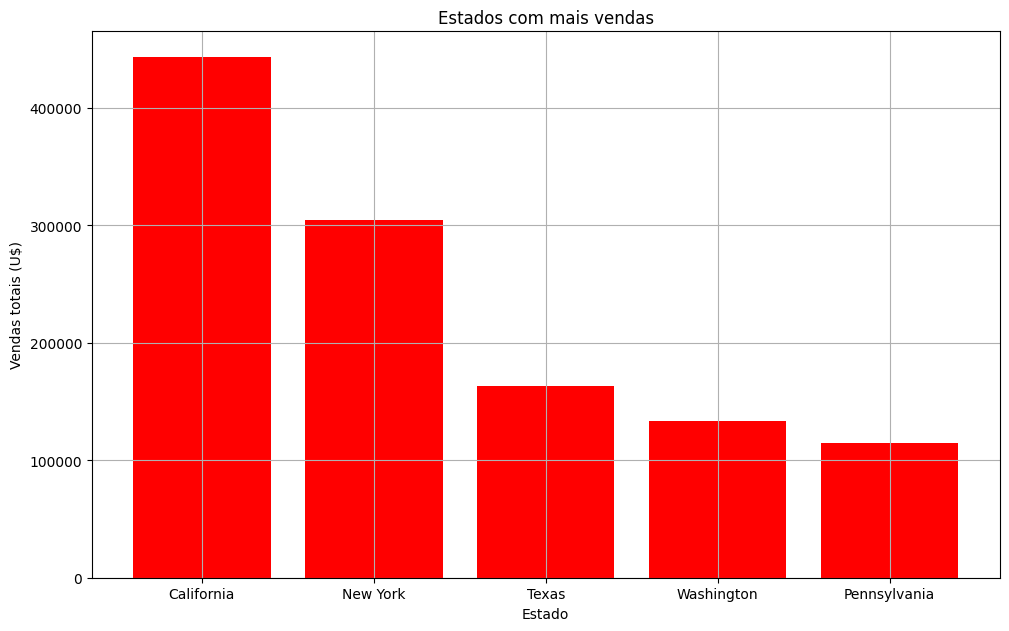

In [30]:
# Pergunta 3: Qual é o total de vendas por estado, mostre em gráico de barras
p3 = df.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=False).head(7)

# # transformação dos valores em lista
# x = p3.index.tolist()
# y = p3.values.tolist()

plt.figure(figsize=(10, 6))

# criação do gráfico
plt.bar(p3.index, p3.values, color='red')
plt.grid()
plt.tight_layout()

# labels e títulos
plt.title("Estados com mais vendas")
plt.ylabel("Vendas totais (U$)")
plt.xlabel("Estado")

Text(0.5, 36.72222222222221, 'Cidades')

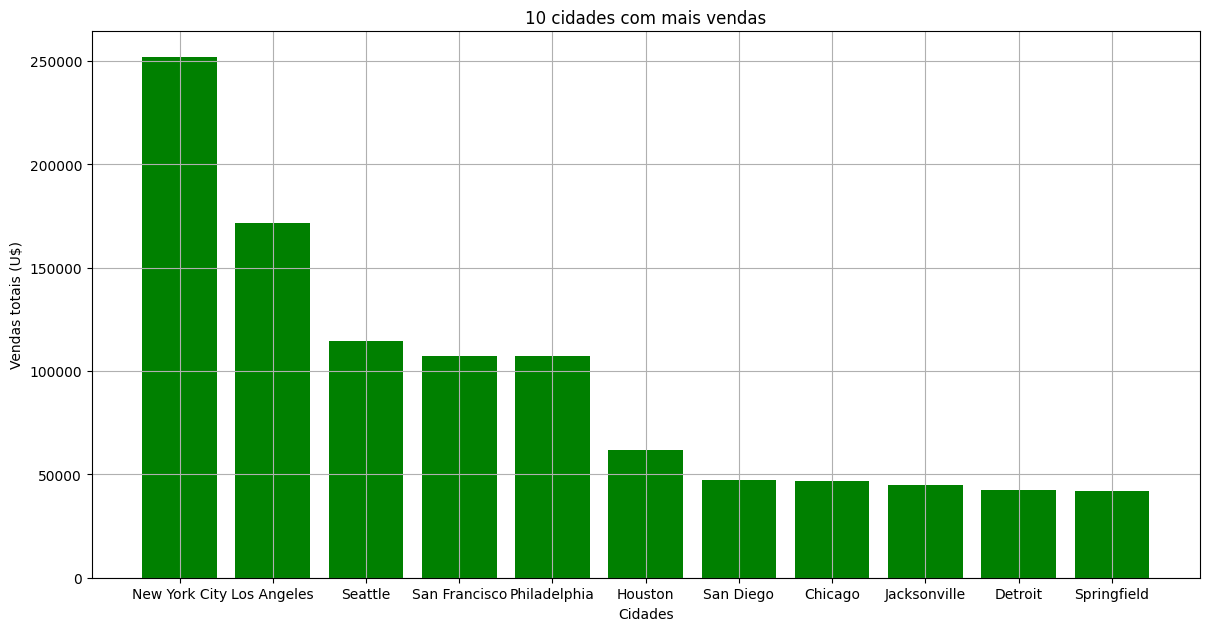

In [34]:
# Pergunta 4: quais são as 10 cidades com maior total de vendas
# cria um df com groupby mostrando a soma das vendas e sorteando do maior pro menor
p4 = df.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(11)

# # transformação dos valores em lista
# x = p4.index.tolist()
# y = p4.values.tolist()

# cria e configura o gráfico
plt.figure(figsize=(12, 6))
plt.bar(p4.index, p4.values, color='green')
plt.grid()
plt.tight_layout()

plt.title("10 cidades com mais vendas")
plt.ylabel("Vendas totais (U$)")
plt.xlabel("Cidades")

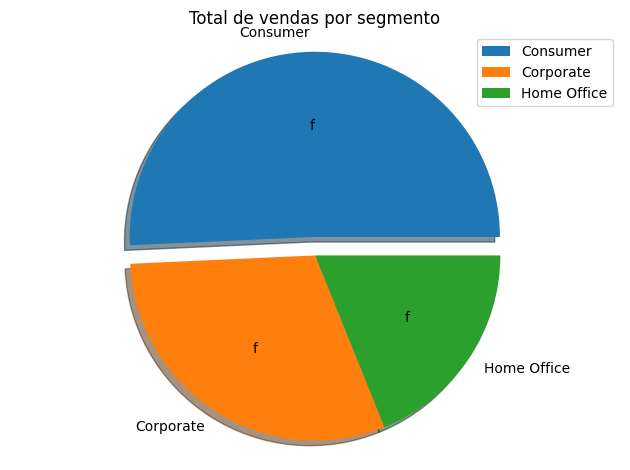

In [46]:
# Pergunta 5: qual segmento teve o maior total de vendas, mostre em gráfico de pizza

p5 = df.groupby('Segmento')['Valor_Venda'].sum().sort_values(ascending=False)

# gráfico
plt.pie(p5.values, labels=p5.index, shadow=True, explode=(0.1, 0, 0))
plt.title("Total de vendas por segmento")
plt.axis('equal')
plt.legend()
plt.tight_layout()
